In [1]:
#Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics

In [2]:
#Loaded DataSet
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
GS_df=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_df=train_df.drop("PassengerId",axis=1)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
GS_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
test_df = pd.merge(test_df, GS_df, on='PassengerId', how='inner')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


#   ****Data preparation****

* Handle Missing Values
* Extract varaible 
* Remove outliers



In [7]:
#Handle Missing Values
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
train_df['Age']=train_df['Age'].fillna(train_df["Age"].mean())
test_df['Age']=test_df['Age'].fillna(test_df["Age"].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df["Fare"].mean())



In [9]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [11]:
train_df=train_df.dropna(axis=1)
test_df=test_df.dropna(axis=1)
# pd.DataFrame(train_df.Age,columns=['Age'])

In [12]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [13]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

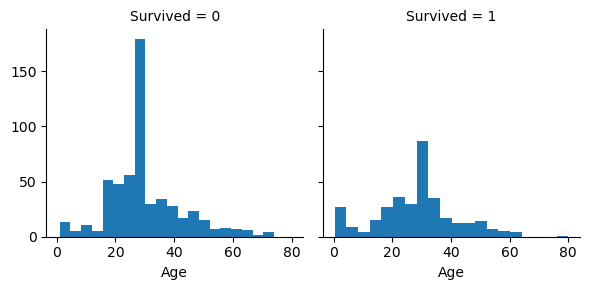

In [14]:
# Removing Outliers
import seaborn as sns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age', bins=20)

In [15]:
train_df['Age'].min()

0.42

In [16]:
train_df1=train_df[train_df['Age'] <= 60 ][train_df.columns]
train_df2=train_df1[train_df1['Age']>= 20 ][train_df1.columns]
# or (train_df['Age'].max())
train_df2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


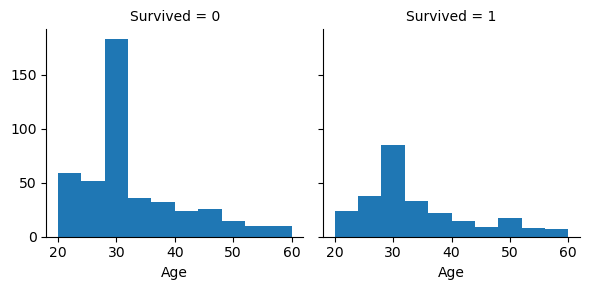

In [17]:
train_df=train_df2
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age', bins=10)
train_df['Age'].min()

train_df=train_df2


In [18]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0


In [19]:
# Extract varaibles
x_train= pd.DataFrame(train_df[['Pclass',"Age","SibSp",'Parch','Fare']])
y_train= pd.DataFrame(train_df["Survived"])

x_test= pd.DataFrame(test_df[['Pclass',"Age","SibSp",'Parch','Fare']])
y_test= pd.DataFrame(test_df["Survived"])


In [20]:
x_train

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
885,3,39.000000,0,5,29.1250
886,2,27.000000,0,0,13.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [21]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
888,0
889,1


# **Model Training**

**Decision Tree:**

In [22]:
from sklearn.tree import DecisionTreeClassifier  
import sklearn.metrics

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
# classifier.fit(x_train,y_train)

ANN:

In [23]:

AdaBoost=AdaBoostClassifier(base_estimator=classifier,n_estimators=300,learning_rate=5)


In [24]:


boostmodel=AdaBoost.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
from sklearn import metrics
y_pred=boostmodel.predict(x_test)
predictions=metrics.accuracy_score(y_test,y_pred)

predictions*100

60.526315789473685

# **Prediction**

In [26]:
x_train

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
885,3,39.000000,0,5,29.1250
886,2,27.000000,0,0,13.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [27]:

boostmodel.predict([[1,38.0,1,0,71.2833]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1])

# **Test accuracy**

In [28]:
y_test.count()


Survived    418
dtype: int64

In [29]:
y_predict=boostmodel.predict(x_test)
y_predict=pd.DataFrame(y_predict)
y_predict.count()

0    418
dtype: int64

In [30]:

from sklearn.metrics import confusion_matrix as CM
from sklearn import metrics
cm=CM(y_test,y_predict)

In [31]:
cm

array([[175,  91],
       [ 74,  78]])

In [32]:
acc=metrics.accuracy_score(y_test,y_predict)
acc*100

60.526315789473685

In [33]:
# Finding precision and recall
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy   :", accuracy*100)
precision = metrics.precision_score(y_test, y_predict)
print("Precision :", precision*100)
recall = metrics.recall_score(y_test, y_predict)
print("Recall    :", recall*100)
F1_score = metrics.f1_score(y_test, y_predict)
print("F1-score  :", F1_score*100)

Accuracy   : 60.526315789473685
Precision : 46.15384615384615
Recall    : 51.31578947368421
F1-score  : 48.5981308411215


# **Virsualization**

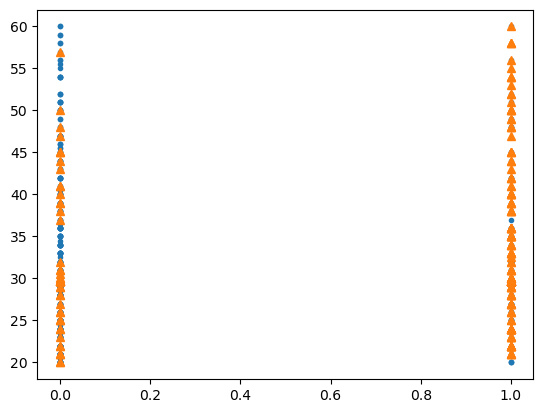

In [34]:
import numpy as np

xpoints = train_df[train_df["Sex"]=="male"]['Survived']
ypoints = train_df[train_df["Sex"]=="male"]["Age"]

x1points = train_df[train_df["Sex"]!="male"]['Survived']
y1points = train_df[train_df["Sex"]!="male"]["Age"]

plt.plot(xpoints, ypoints,".")
plt.plot(x1points, y1points,"^")





In [35]:
train_df["Age"].min(),train_df["Age"].max()

(20.0, 60.0)

20.0

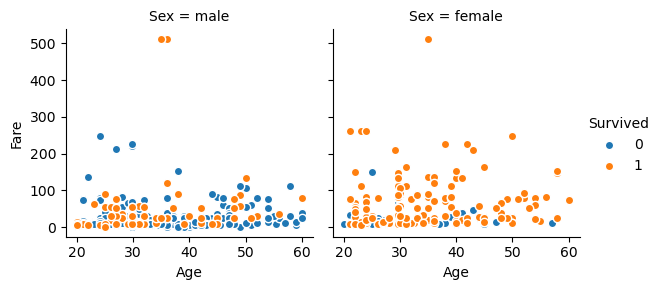

In [36]:
g = sns.FacetGrid(train_df, col='Sex',hue='Survived')
g.map(plt.scatter,'Age','Fare',edgecolor ="w").add_legend()
train_df['Age'].min()

/tmp/ipykernel_20/663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

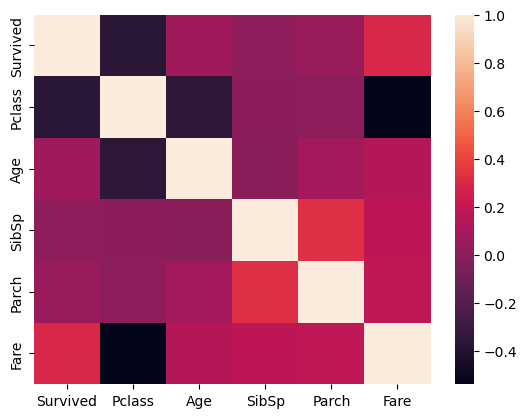

In [37]:
sns.heatmap(train_df.corr())

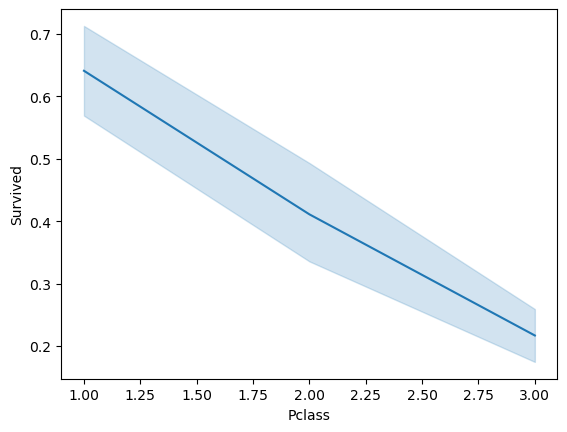

In [38]:
sns.lineplot(x="Pclass", y="Survived", data=train_df)
plt.show()

/tmp/ipykernel_20/2418938664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Parch'], kde = True, color ='red', bins = 30)


<Axes: xlabel='Parch', ylabel='Density'>

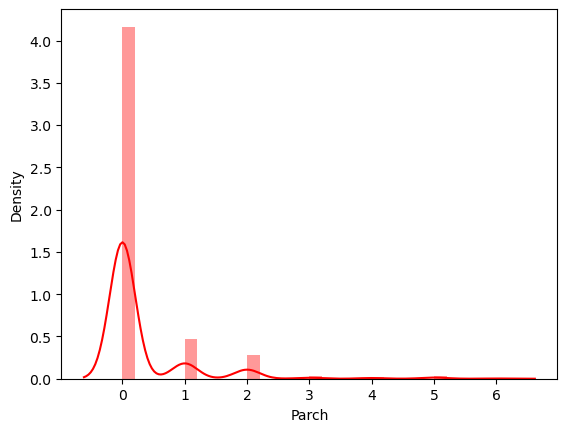

In [39]:

sns.distplot(train_df['Parch'], kde = True, color ='red', bins = 30)


<Axes: xlabel='Parch', ylabel='Survived'>

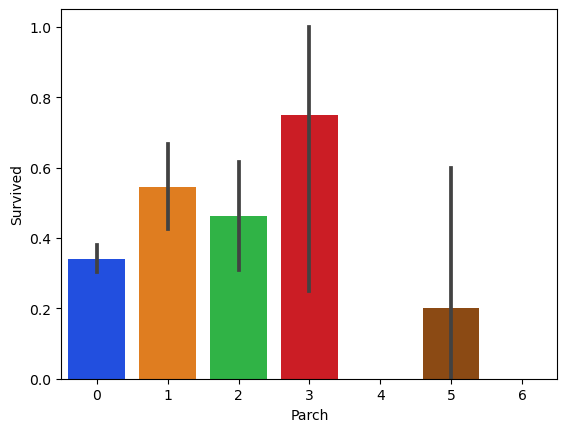

In [40]:

sns.barplot(data=train_df,x="Parch",y="Survived", palette='bright')

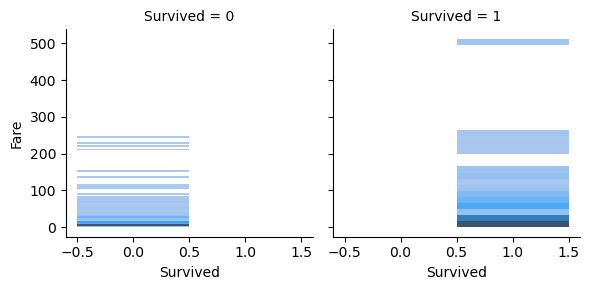

In [41]:

sea = sns.FacetGrid(train_df, col = "Survived")
sea.map(sns.histplot,"Survived","Fare")

<Axes: xlabel='SibSp', ylabel='count'>

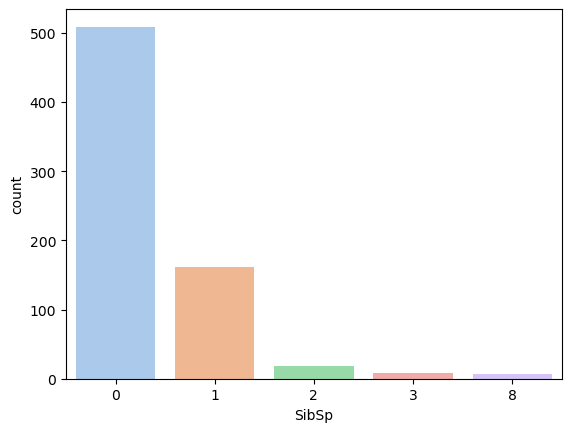

In [42]:
# sns.barplot(data=train_df,x="SibSp",y='Survived',color='y')


sns.countplot(x=train_df['SibSp'],palette='pastel')

# **Submission**

In [43]:

test_df=pd.concat([test_df,GS_df['Survived']],axis = 1).dropna()

In [44]:
y_predict=boostmodel.predict(test_df[['Pclass','Age','SibSp','Parch','Fare']])
y_predict=pd.DataFrame(y_predict)
submission=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':np.array(y_predict).ravel()})

#submit file

submission.to_csv("submission.csv", index=False)

submission

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
